In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
gold_data = pd.read_csv("C:\\Users\\Pranav\\OneDrive\\Desktop\\Datasets\\gold_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = gold_data.corr()

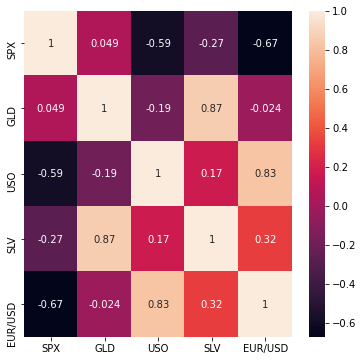

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


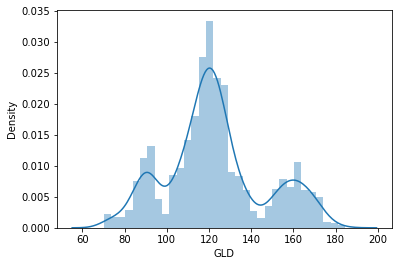

In [11]:
sns.distplot(gold_data['GLD'])
plt.show()

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
y_test_pred = regressor.predict(X_test)

In [17]:
print(y_test_pred)

[153.79680186  92.72879978 160.89190048 165.81150247 120.61720069
 118.05170104 136.45589702 153.60820112 171.81910196 149.05839903
 165.61810349 130.72479992 155.08210282 113.42550064 145.74410044
 114.14009928 118.901199   170.6361986   83.85259867 113.9329004
 156.39220142 127.0664005  154.93090153 127.08579852 118.0372998
  90.82079927 125.91819882 124.37529955 115.24700001 123.71789916
 116.53160043 167.8599991   86.91619833 150.47729746 149.87010214
 120.18459911 167.24459924 119.81830101 120.16809936 123.39440012
 120.93859971 118.4361005  110.04789833 151.98830052 151.95460062
 108.75379968  93.82409971  94.17920026  72.80260018 112.07379989
 135.2424979  129.04349859 168.16199865 115.42249959 125.09530021
  90.64059955 154.15019965 124.31079989  92.62089941 125.81899813
 117.38280045 127.1429992   75.08910081 146.3036999  121.4441993
 152.98180135  75.85839955 110.32969983 120.118001   109.13420054
 153.93620109  92.54859846 118.65719969 119.2615995  132.7705011
 147.74660079 

In [18]:
error_score = r2_score(y_test,y_test_pred)

In [19]:
print("R squared error : ", error_score)

R squared error :  0.9872599629159212


In [20]:
y_test = list(y_test)

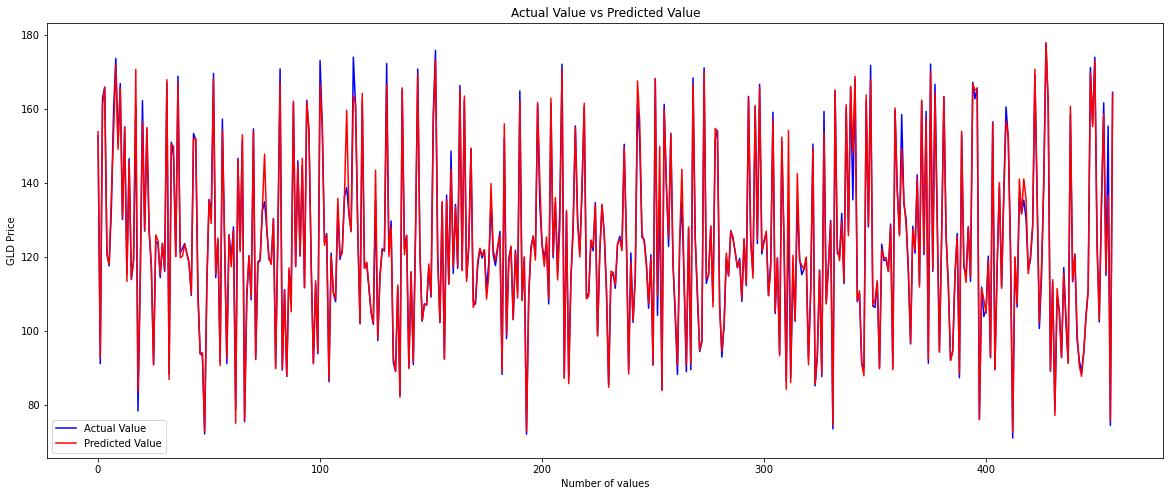

In [21]:
plt.figure(figsize=(20,8))
plt.plot(y_test,color='blue', label='Actual Value')
plt.plot(y_test_pred, color='red', label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()